# Informe: Implementación de una Red Neuronal desde Cero y Comparación con Keras/TensorFlow

* Angela Maria Gonzalez Cordoba
* Juan Manuel Casanova Marin
* Juliana Filigrana Valencia

El aprendizaje profundo permite construir modelos capaces de aprender patrones complejos a partir de datos. En este trabajo se implementa una red neuronal desde cero, sin usar librerías de alto nivel, con el objetivo de comprender el funcionamiento interno del entrenamiento mediante propagación hacia adelante, propagación hacia atrás y descenso de gradiente.

Posteriormente, se entrena un modelo equivalente utilizando una librería profesional (Keras/TensorFlow) y se comparan los resultados obtenidos. Para este experimento se utiliza un dataset distinto al visto en clase, tomado de Kaggle, concretamente el dataset Titanic, cuyo objetivo es predecir la supervivencia de los pasajeros.

### Dataset: Titanic (Kaggle):

**Problema a resolver**

El presente trabajo aborda un problema de clasificación binaria, cuyo objetivo es predecir si un pasajero del Titanic sobrevivió o no al naufragio.

La variable objetivo toma dos posibles valores:

1 → El pasajero sobrevivió

0 → El pasajero no sobrevivió

Por lo tanto, el problema consiste en estimar la probabilidad de supervivencia a partir de un conjunto de características asociadas a cada pasajero.

**Dataset utilizado**

Se utiliza el dataset Titanic, uno de los conjuntos de datos más conocidos en aprendizaje automático. Este dataset contiene información sobre los pasajeros, incluyendo variables como:

Clase del pasajero (Pclass)

- Edad

- Sexo

- Número de familiares a bordo

- Tarifa pagada

- Entre otras características relevantes

Estas variables actúan como variables predictoras, mientras que la supervivencia es la variable objetivo.

El dataset es ampliamente utilizado en la enseñanza de inteligencia artificial debido a que:

- Es un problema real

- Permite aplicar técnicas de clasificación

- Presenta relaciones no lineales entre variables

In [7]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


### Cargar y preparar el dataset Titanic


El preprocesamiento de los datos constituye una etapa fundamental en el desarrollo de modelos de aprendizaje automático, ya que la calidad y preparación de los datos influyen directamente en el desempeño del modelo.

Antes de entrenar la red neuronal, se realizaron los siguientes procedimientos:

El dataset Titanic fue cargado desde un archivo CSV utilizando la librería pandas.

Posteriormente, se seleccionaron únicamente las variables consideradas relevantes para la predicción de la supervivencia:

- Pclass

- Sex

- Age

- SibSp

- Parch

- Fare

Esta selección se realizó con el objetivo de:

- Reducir dimensionalidad.

- Eliminar variables irrelevantes o redundantes.

- Disminuir el ruido en el modelo.

- La reducción de variables ayuda a mejorar la capacidad de generalización y reduce el riesgo de sobreajuste.


El preprocesamiento de los datos incluyó la selección de variables relevantes, el tratamiento de valores faltantes, la codificación de variables categóricas y la normalización de los datos.

Antes de entrenar la red neuronal, se realizaron los siguientes pasos de preprocesamiento:

- Se cargó el dataset Titanic desde un archivo CSV.

- Se seleccionaron únicamente las variables relevantes para la predicción de la supervivencia.

- La variable categórica Sex fue codificada en formato numérico.

- Los valores faltantes de la variable Age fueron reemplazados por la media.

- Se separaron las variables independientes (X) y la variable objetivo (y).

- El conjunto de datos se dividió en entrenamiento (80%) y prueba (20%).

- Las características fueron normalizadas utilizando StandardScaler para mejorar la convergencia del modelo.

In [8]:
# Cargar dataset
df = pd.read_csv("train.csv")

# Seleccionar columnas útiles
df = df[["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]]

# Convertir variable categórica
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# Rellenar valores faltantes
df["Age"].fillna(df["Age"].mean(), inplace=True)

# Separar X e y
X = df.drop("Survived", axis=1).values
y = df["Survived"].values.reshape(1, -1)

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y.T, test_size=0.2, random_state=42
)

X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

# Normalizar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.T).T
X_test = scaler.transform(X_test.T).T

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)


X_train: (6, 712)
y_train: (1, 712)


C:\Users\Angela\AppData\Local\Temp\ipykernel_26612\2450025653.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)


**Codificación de variables categóricas**
La variable Sex, de tipo categórico, fue transformada a formato numérico mediante codificación binaria:

- male → 0

- female → 1

Esta transformación es necesaria porque las redes neuronales operan únicamente con valores numéricos.

Además, al tratarse de una variable binaria, esta codificación no introduce relaciones ordinales artificiales entre categorías.

**Tratamiento de valores faltantes**

La variable Age presentaba valores faltantes.

Estos fueron reemplazados por la media aritmética de la variable, una técnica común de imputación cuando:

- El porcentaje de datos faltantes no es elevado.

- Se desea mantener el tamaño del dataset.

- No se dispone de información adicional para una imputación más sofisticada.

La imputación permite evitar la eliminación de registros, lo que podría reducir la cantidad de datos disponibles para entrenamiento.

- El conjunto de entrenamiento contiene 712 muestras.

- Cada muestra está descrita por 6 variables de entrada.

- La variable objetivo tiene dimensión (1, 712), correspondiente a una etiqueta binaria por muestra.

- Los datos fueron organizados en el formato requerido por la implementación manual de la red neuronal.

**Separación de variables independientes y variable objetivo**

El conjunto de datos fue dividido en:

- X → Variables predictoras

- y → Variable objetivo (Survived)

La variable objetivo fue reformateada para ajustarse a la estructura requerida por la implementación manual de la red neuronal.

**División en entrenamiento y prueba**

El dataset fue dividido en:

- 80% para entrenamiento

- 20% para prueba

Esta división permite:

- Entrenar el modelo con una porción de los datos.

- Evaluar su capacidad de generalización en datos no vistos.

- Se utilizó random_state=42 para garantizar reproducibilidad de los resultados.

Las variables fueron normalizadas utilizando StandardScaler, que transforma los datos para que tengan:

- Media = 0

- Desviación estándar = 1

La normalización es especialmente importante en redes neuronales porque:

- Evita que variables con escalas grandes (como Fare) dominen el proceso de aprendizaje.

- Mejora la estabilidad numérica.

- Acelera la convergencia del algoritmo de gradiente descendente.

Dado que la red neuronal utiliza activaciones ReLU y optimización basada en gradiente, la estandarización contribuye significativamente al desempeño del modelo.

**Justificación del uso de fit solo en el conjunto de entrenamiento**

El StandardScaler fue ajustado (fit) únicamente con los datos de entrenamiento y luego aplicado tanto al conjunto de entrenamiento como al de prueba.

Esto se realizó para evitar fuga de información (data leakage).

Si la normalización se calculara utilizando todo el dataset antes de la división, las estadísticas (media y desviación estándar) incluirían información del conjunto de prueba, lo que introduciría un sesgo en la evaluación del modelo.

Al ajustar el scaler solo con los datos de entrenamiento:

- El modelo no tiene acceso indirecto a información del conjunto de prueba.

- La evaluación refleja de manera más realista la capacidad de generalización.

- Se mantiene la independencia entre entrenamiento y prueba.

### Distribución de la variable objetivo (Survived)

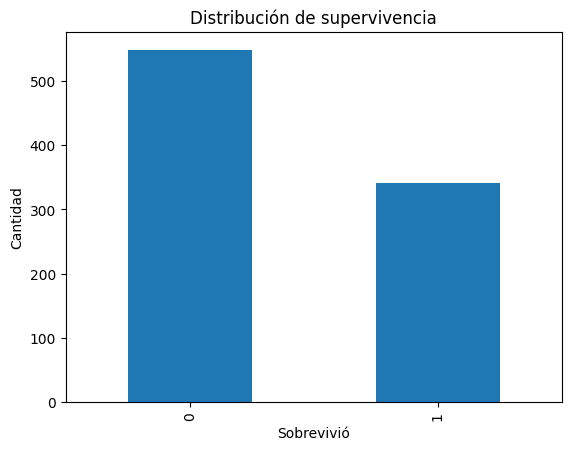

In [9]:
import matplotlib.pyplot as plt

plt.figure()
df["Survived"].value_counts().plot(kind="bar")
plt.title("Distribución de supervivencia")
plt.xlabel("Sobrevivió")
plt.ylabel("Cantidad")
plt.show()

El gráfico muestra que la cantidad de pasajeros que no sobrevivieron (0) es considerablemente mayor que la de aquellos que sí sobrevivieron (1). Esto evidencia que el dataset presenta un desbalance de clases, donde la categoría de no supervivencia domina.

Este comportamiento es importante durante el entrenamiento del modelo, ya que una red neuronal podría tender a favorecer la clase mayoritaria. Por ello, la métrica de exactitud debe analizarse con cuidado, pues un valor alto podría lograrse simplemente prediciendo con mayor frecuencia la clase más común



### Supervivencia por sexo

<Figure size 640x480 with 0 Axes>

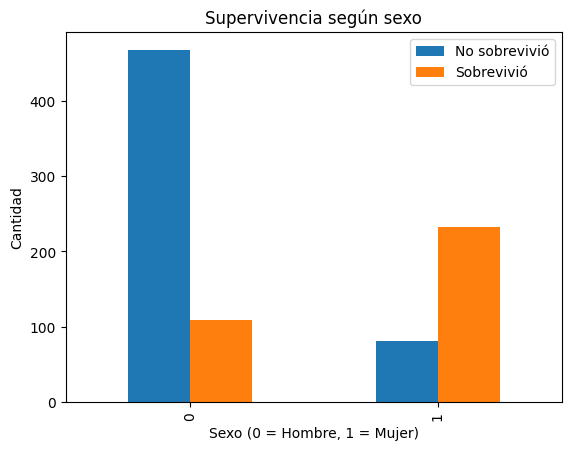

In [10]:
plt.figure()
pd.crosstab(df["Sex"], df["Survived"]).plot(kind="bar")
plt.title("Supervivencia según sexo")
plt.xlabel("Sexo (0 = Hombre, 1 = Mujer)")
plt.ylabel("Cantidad")
plt.legend(["No sobrevivió", "Sobrevivió"])
plt.show()

El gráfico evidencia una diferencia marcada en la supervivencia según el sexo del pasajero. La mayoría de los hombres (0) no sobrevivieron, mientras que una proporción considerablemente mayor de mujeres (1) logró sobrevivir.

Este patrón sugiere que el sexo fue un factor determinante durante la evacuación del Titanic, lo que coincide con la política histórica de “mujeres y niños primero”. En consecuencia, esta variable resulta altamente informativa para el modelo de predicción y probablemente tendrá un peso importante en el entrenamiento de la red neuronal.

### Distribución de edades

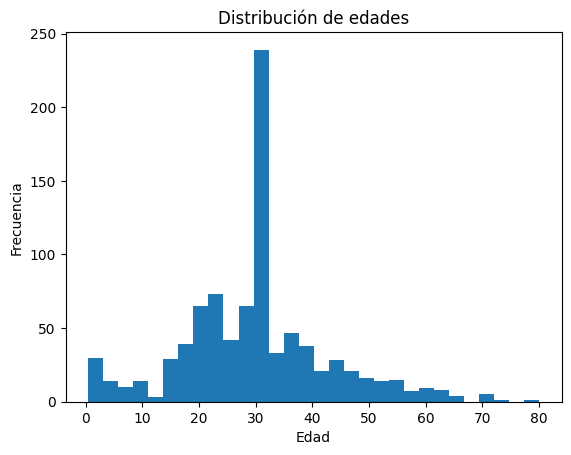

In [11]:
plt.figure()
plt.hist(df["Age"], bins=30)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

El histograma muestra que la mayoría de los pasajeros se concentra en edades adultas jóvenes, principalmente entre los 20 y 40 años. También se observa la presencia de niños y de personas de mayor edad, aunque en menor proporción.

La distribución presenta una ligera asimetría hacia la derecha, con algunos valores extremos correspondientes a pasajeros de edad avanzada. Esta variabilidad sugiere que la edad podría influir en la probabilidad de supervivencia, por lo que constituye una característica relevante para el entrenamiento del modelo.

### Red neuronal **Manual**

**Función sigmoide:**
La función sigmoide fue utilizada en la capa de salida de la red neuronal. Esta función transforma cualquier valor real en un número dentro del intervalo (0,1), lo que permite interpretar la salida del modelo como una probabilidad de supervivencia.


**Función ReLU (Rectified Linear Unit):**

Esta función introduce no linealidad en el modelo, lo que permite que la red neuronal aprenda relaciones complejas entre las variables de entrada y la variable objetivo.

Además, ReLU ayuda a mitigar el problema del gradiente desvanecido, ya que mantiene gradientes constantes para valores positivos, lo que favorece un entrenamiento más estable y eficiente en comparación con funciones como la sigmoide o la tangente hiperbólica en capas ocultas.

In [12]:
#Función de activación sigmoide.
#(Convierte valores reales en probabilidades en el rango [0, 1].)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#Función de activación ReLU.
  #Devuelve 0 para valores negativos y mantiene los positivos.
def relu(z):
    return np.maximum(0, z)


**Inicialización de los parámetros de la red**

Para comenzar el entrenamiento de la red neuronal, se inicializaron los pesos y sesgos de cada capa de la siguiente manera:

- Los pesos fueron inicializados con valores aleatorios pequeños para evitar saturación temprana de las funciones de activación.

- Los sesgos (bias) fueron inicializados en cero.

- Se utilizó una semilla aleatoria para garantizar la reproducibilidad de los resultados.

La red cuenta con:

1. Una capa de entrada con n_x características.

2. Una capa oculta con n_h neuronas.

3. Una capa de salida con una sola neurona para la clasificación binaria.

Esta inicialización permite un inicio estable del proceso de entrenamiento mediante descenso por gradiente.

In [13]:
def initialize_parameters(n_x, n_h):
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(1, n_h) * 0.01
    b2 = np.zeros((1, 1))
    return W1, b1, W2, b2


 **Propagación hacia adelante (Forward Propagation)**

En esta etapa se calcula la salida de la red neuronal a partir de los datos de entrada:

- Se realiza una combinación lineal entre las entradas y los pesos de la capa oculta.

- Se aplica la función de activación ReLU para obtener las activaciones de la capa oculta.

- Se calcula la combinación lineal de la capa de salida.

- Se aplica la función sigmoide para obtener la probabilidad de supervivencia.

- Se almacenan los valores intermedios necesarios para la fase de retropropagación.

Este proceso permite que la red genere una predicción a partir de las características de entrada.

 **¿Qué es exactamente el cache?**

El cache no es un valor matemático especial, ni un parámetro del modelo.

Es simplemente una tupla (contenedor de datos) que guarda resultados intermedios calculados durante la propagación hacia adelante.

Eso significa que el cache contiene:

Z1 → Resultado de la combinación lineal en la capa oculta

A1 → Activación de la capa oculta (después de ReLU)

Z2 → Combinación lineal en la capa de salida

A2 → Activación final (probabilidad)

In [14]:
# Función que ejecuta la propagación hacia adelante
def forward_propagation(X, W1, b1, W2, b2):
    
    # Paso 1: Combinación lineal en la capa oculta
    # Se multiplican los datos de entrada por los pesos W1 y se suma el sesgo b1
    Z1 = np.dot(W1, X) + b1
    
    # Paso 2: Aplicar la función de activación ReLU
    # Introduce no linealidad en la red
    A1 = relu(Z1)
    
    # Paso 3: Combinación lineal en la capa de salida
    # Se multiplican las activaciones de la capa oculta por W2 y se suma b2
    Z2 = np.dot(W2, A1) + b2
    
    # Paso 4: Aplicar la función sigmoide
    # Convierte el resultado en una probabilidad entre 0 y 1
    A2 = sigmoid(Z2)
    
    # Guardar valores intermedios para usarlos en la retropropagación
    cache = (Z1, A1, Z2, A2)
    
    # Retornar la predicción y los valores almacenados
    return A2, cache


**Función de pérdida**

Calcula la función de pérdida Binary Cross-Entropy, que mide qué tan diferente es la predicción del modelo respecto al valor real. Se usa en problemas de clasificación binaria, como en este caso (sobrevive / no sobrevive).

Se utilizó la función de pérdida Binary Cross-Entropy porque el problema es de clasificación binaria (sobrevive / no sobrevive) y la capa de salida emplea una función sigmoide que produce probabilidades entre 0 y 1.

Esta función es adecuada porque mide qué tan bien las probabilidades predichas se ajustan a los valores reales y penaliza con mayor fuerza las predicciones incorrectas muy seguras..

In [15]:
#Calcula la función de pérdida (binary cross-entropy).
def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = -(1/m) * np.sum(
        Y * np.log(A2 + 1e-8) + (1 - Y) * np.log(1 - A2 + 1e-8)
    )
    return cost


**Retropropagación del error (Backpropagation)**

En esta fase se calculan los gradientes necesarios para actualizar los parámetros de la red neuronal:

- Se calcula el error en la capa de salida comparando la predicción con el valor real.

- Se obtienen los gradientes de los pesos y sesgos de la capa de salida.

- El error se propaga hacia atrás hasta la capa oculta.

- Se utiliza la derivada de la función ReLU para calcular el gradiente en la capa oculta.

- Se calculan los gradientes correspondientes a los pesos y sesgos de la capa oculta.

- Los gradientes se normalizan dividiendo por el número de muestras de entrenamiento.

Este procedimiento permite ajustar los parámetros de la red mediante descenso por gradiente, minimizando la función de costo.

In [16]:
  #Ejecuta la retropropagación del error y calcula los gradiente
def backward_propagation(X, Y, cache, W2):
    m = X.shape[1]
    Z1, A1, Z2, A2 = cache

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * (Z1 > 0)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2


**Arquitectura de la red neuronal**

La red neuronal implementada está compuesta por:

- Una capa de entrada con 6 neuronas, correspondientes a las 6 características seleccionadas del dataset.

- Una capa oculta con 𝑛_ℎ neuronas.

- Una capa de salida con 1 neurona, encargada de predecir la probabilidad de supervivencia.

En total, la arquitectura cuenta con 3 capas (entrada, oculta y salida).


**Justificación de la arquitectura**

Se optó por una red con una sola capa oculta debido a que el dataset Titanic no es excesivamente complejo y no requiere una arquitectura profunda.

Una única capa oculta es suficiente para modelar relaciones no lineales entre las variables de entrada y la variable objetivo.

El número de neuronas en la capa oculta (𝑛_ℎ​) se eligió como un valor intermedio que permite al modelo:

- Tener suficiente capacidad para aprender patrones.

- Evitar sobreajuste en un dataset relativamente pequeño.

**Entrenamiento de la red neuronal (Training)**
Se obtiene el número de características de entrada n_x y se inicializan los parámetros (W1, b1, W2, b2).

Durante cada iteración:

- Se realiza la propagación hacia adelante para obtener las predicciones A2.

- Se calcula el costo usando la función de pérdida (entropía cruzada binaria).

- Se ejecuta la retropropagación para calcular los gradientes de los parámetros.

- Se actualizan los parámetros mediante descenso por gradiente usando el learning_rate.

- Cada 500 iteraciones se imprime el costo para observar si el modelo está aprendiendo correctamente.

Este proceso se repite num_iterations veces hasta que el costo disminuya y el modelo logre una mejor capacidad de predicción.

**¿Por qué se imprime el costo cada 500 iteraciones?**

El valor 500 no es obligatorio ni matemáticamente especial. Se elige como un intervalo práctico para monitorear el entrenamiento sin saturar la salida con demasiada información.

In [17]:
# Entrena la red neuronal utilizando descenso por gradiente.
def train_nn(X, Y, n_h, learning_rate, num_iterations):
    n_x = X.shape[0]
    W1, b1, W2, b2 = initialize_parameters(n_x, n_h)
    costs = []

    for i in range(num_iterations):
      #forward
        A2, cache = forward_propagation(X, W1, b1, W2, b2)
      #costo
        cost = compute_cost(A2, Y)
      #backward
        dW1, db1, dW2, db2 = backward_propagation(X, Y, cache, W2)

        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

        if i % 500 == 0:
            costs.append(cost)
            print(f"Iteración {i} - Costo: {cost:.4f}")

    return W1, b1, W2, b2, costs


In [18]:
#capturar lo que devuelve la función al momento de entrenar
W1, b1, W2, b2, costs = train_nn(
    X_train, y_train,
    n_h=10,
    learning_rate=0.01,
    num_iterations=5000
)


Iteración 0 - Costo: 0.6931
Iteración 500 - Costo: 0.6639
Iteración 1000 - Costo: 0.6527
Iteración 1500 - Costo: 0.5945
Iteración 2000 - Costo: 0.5025
Iteración 2500 - Costo: 0.4608
Iteración 3000 - Costo: 0.4468
Iteración 3500 - Costo: 0.4412
Iteración 4000 - Costo: 0.4382
Iteración 4500 - Costo: 0.4360


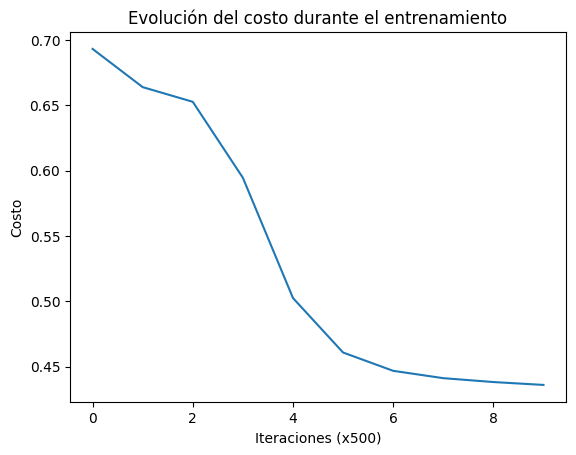

In [19]:
plt.plot(costs)
plt.title("Evolución del costo durante el entrenamiento")
plt.xlabel("Iteraciones (x500)")
plt.ylabel("Costo")
plt.show()


La gráfica muestra la evolución del costo a lo largo del entrenamiento. Se observa una disminución sostenida a medida que aumentan las iteraciones, lo que indica que el algoritmo de descenso por gradiente está ajustando correctamente los parámetros de la red.

Durante las primeras iteraciones la reducción del error es más pronunciada, evidenciando que el modelo aprende rápidamente patrones generales de los datos. Posteriormente, la curva comienza a estabilizarse y la mejora se vuelve más gradual, lo cual es esperable cuando el entrenamiento se acerca a una zona de convergencia.

En conjunto, este comportamiento confirma que la red neuronal está aprendiendo de manera adecuada y que la tasa de aprendizaje seleccionada permite una optimización estable.

In [20]:
print("Promedio |W1|:", np.mean(np.abs(W1)))
print("Promedio |W2|:", np.mean(np.abs(W2)))


Promedio |W1|: 0.10529412035730369
Promedio |W2|: 0.3714396577654913


**Predicción del modelo**
Una vez entrenada la red neuronal, se utiliza el modelo para generar predicciones sobre nuevos datos:

- Se realiza una propagación hacia adelante con los parámetros entrenados.

- La salida del modelo corresponde a una probabilidad entre 0 y 1.

- Se aplica un umbral de 0.5 para convertir la probabilidad en una clase binaria.

El resultado final indica si el pasajero sobrevive (1) o no sobrevive (0).

In [21]:
#Genera predicciones binarias utilizando los parámetros entrenados.
def predict(X, W1, b1, W2, b2):
    A2, _ = forward_propagation(X, W1, b1, W2, b2)
    return (A2 > 0.5).astype(int)


In [22]:
y_pred_train = predict(X_train, W1, b1, W2, b2)
y_pred_test = predict(X_test, W1, b1, W2, b2)

print("Accuracy entrenamiento:",
      accuracy_score(y_train.flatten(), y_pred_train.flatten()))

print("Accuracy prueba:",
      accuracy_score(y_test.flatten(), y_pred_test.flatten()))


Accuracy entrenamiento: 0.8061797752808989
Accuracy prueba: 0.7877094972067039


El modelo obtuvo una exactitud de aproximadamente 80.6% sobre el conjunto de entrenamiento y 78.8% sobre el conjunto de prueba.

La cercanía entre ambos valores indica que la red neuronal presenta una buena capacidad de generalización, ya que el desempeño en datos no vistos es similar al obtenido durante el aprendizaje. No se evidencian señales fuertes de sobreajuste (overfitting).

Estos resultados sugieren que la arquitectura seleccionada y la configuración del entrenamiento permiten capturar patrones relevantes del problema de supervivencia de los pasajeros.

Ahora se calculara: 
Precision → Qué tan confiables son las predicciones positivas.

Recall → Qué porcentaje de los verdaderos sobrevivientes detecta el modelo.

F1-score → Balance entre precision y recall.

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test.flatten(), y_pred_test.flatten()))


              precision    recall  f1-score   support

           0       0.79      0.87      0.83       105
           1       0.78      0.68      0.72        74

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.78       179



El modelo obtuvo una exactitud (accuracy) del 79% sobre el conjunto de prueba, lo que indica que clasifica correctamente aproximadamente 8 de cada 10 pasajeros.

**Clase 0 (No sobrevivió)**

Precision: 0.79 → Cuando el modelo predice que un pasajero no sobrevivió, acierta el 79% de las veces.

Recall: 0.87 → Detecta correctamente el 87% de los pasajeros que realmente no sobrevivieron.

F1-score: 0.83 → Buen equilibrio entre precisión y recall para esta clase.

Esto indica que el modelo identifica bastante bien a los pasajeros que no sobrevivieron.

**Clase 1 (Sobrevivió)**

Precision: 0.78 → Cuando el modelo predice que un pasajero sobrevivió, acierta el 78% de las veces.

Recall: 0.68 → Solo detecta el 68% de los pasajeros que realmente sobrevivieron.

F1-score: 0.72 → Desempeño ligeramente inferior comparado con la clase 0.

Esto sugiere que el modelo tiene mayor dificultad para identificar correctamente a los sobrevivientes, cometiendo más falsos negativos en esta clase.

En general:

El promedio macro (0.78) y el promedio ponderado (0.78–0.79) muestran un desempeño equilibrado entre ambas clases.

Sin embargo, el recall más bajo en la clase de sobrevivientes indica que el modelo tiende a predecir con mayor facilidad la clase "no sobrevivió". Esto puede estar influenciado por:

La distribución de clases en el dataset.

Patrones más claros asociados a la no supervivencia.

En general, el modelo presenta un buen desempeño y una capacidad de generalización adecuada, aunque podría mejorarse el recall de la clase 1 mediante ajustes en el umbral de decisión o en los hiperparámetros.

### Matriz de confusión

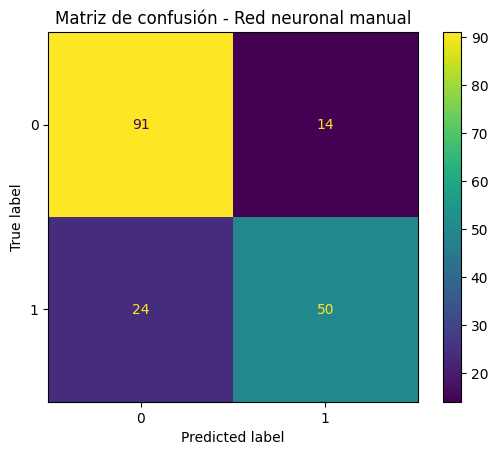

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test.flatten(), y_pred_test.flatten())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de confusión - Red neuronal manual")
plt.show()


Se observa que:

* 91 pasajeros fueron correctamente clasificados como no sobrevivientes (verdaderos negativos).

* 50 pasajeros fueron correctamente identificados como sobrevivientes (verdaderos positivos).

* 14 casos corresponden a pasajeros que el modelo predijo como sobrevivientes cuando en realidad no lo hicieron (falsos positivos).

* 24 sobrevivientes reales fueron clasificados incorrectamente como no sobrevivientes (falsos negativos).

En general, el modelo presenta un buen desempeño, con una cantidad alta de predicciones correctas en ambas clases. Sin embargo, se aprecia una ligera tendencia a cometer más errores al identificar a los pasajeros que sí sobrevivieron, como lo indica el número de falsos negativos.

Este comportamiento puede estar influenciado por el desbalance presente en el dataset, donde la clase de no supervivencia es mayoritaria.

**📊 Análisis de la Experimentación con Hiperparámetros**

Con el objetivo de evaluar el impacto de la complejidad del modelo y la tasa de aprendizaje, se probaron múltiples configuraciones variando:

Número de neuronas en la capa oculta (n_h)

Tasa de aprendizaje (learning_rate)

Cada configuración fue entrenada durante 3000 iteraciones y evaluada mediante:

Accuracy en entrenamiento

Accuracy en prueba

F1-score en prueba

In [33]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import numpy as np

# ==============================
# 1️⃣ Definir hiperparámetros
# ==============================

neuronas_list = [2, 4, 8, 16, 32]
learning_rates = [0.1, 0.01, 0.005, 0.001]

# Crear todas las combinaciones
configs = [(n_h, lr) for n_h in neuronas_list for lr in learning_rates]

# ==============================
# 2️⃣ Ejecutar experimentación
# ==============================

resultados = []

for n_h, lr in configs:
    
    print(f"\n🔹 n_h={n_h} | lr={lr}")

    # Entrenar modelo
    W1, b1, W2, b2, _ = train_nn(
        X_train, y_train,
        n_h=n_h,
        learning_rate=lr,
        num_iterations=3000
    )

    # Predicciones
    y_pred_train = predict(X_train, W1, b1, W2, b2)
    y_pred_test = predict(X_test, W1, b1, W2, b2)

    # Métricas
    train_acc = accuracy_score(y_train.ravel(), y_pred_train.ravel())
    test_acc = accuracy_score(y_test.ravel(), y_pred_test.ravel())
    f1 = f1_score(y_test.ravel(), y_pred_test.ravel())

    resultados.append({
        "Neuronas": n_h,
        "Learning Rate": lr,
        "Train Acc": train_acc,
        "Test Acc": test_acc,
        "F1 Test": f1,
        "Gap": train_acc - test_acc
    })

# ==============================
# 3️⃣ Crear DataFrame final
# ==============================

df_resultados = pd.DataFrame(resultados)

# Ordenar por desempeño en test
df_resultados = df_resultados.sort_values(by="Test Acc", ascending=False)

print(df_resultados)



🔹 n_h=2 | lr=0.1
Iteración 0 - Costo: 0.6931
Iteración 500 - Costo: 0.4720
Iteración 1000 - Costo: 0.4370
Iteración 1500 - Costo: 0.4277
Iteración 2000 - Costo: 0.4248
Iteración 2500 - Costo: 0.4237

🔹 n_h=2 | lr=0.01
Iteración 0 - Costo: 0.6931
Iteración 500 - Costo: 0.6647
Iteración 1000 - Costo: 0.6611
Iteración 1500 - Costo: 0.6546
Iteración 2000 - Costo: 0.6287
Iteración 2500 - Costo: 0.5771

🔹 n_h=2 | lr=0.005
Iteración 0 - Costo: 0.6931
Iteración 500 - Costo: 0.6712
Iteración 1000 - Costo: 0.6647
Iteración 1500 - Costo: 0.6625
Iteración 2000 - Costo: 0.6611
Iteración 2500 - Costo: 0.6590

🔹 n_h=2 | lr=0.001
Iteración 0 - Costo: 0.6931
Iteración 500 - Costo: 0.6864
Iteración 1000 - Costo: 0.6811
Iteración 1500 - Costo: 0.6770
Iteración 2000 - Costo: 0.6737
Iteración 2500 - Costo: 0.6712

🔹 n_h=4 | lr=0.1
Iteración 0 - Costo: 0.6931
Iteración 500 - Costo: 0.4745
Iteración 1000 - Costo: 0.4392
Iteración 1500 - Costo: 0.4278
Iteración 2000 - Costo: 0.4229
Iteración 2500 - Costo: 0.

In [34]:
pivot = df_resultados.pivot(
    index="Neuronas",
    columns="Learning Rate",
    values="Test Acc"
)

print(pivot)


Learning Rate     0.001     0.005     0.010     0.100
Neuronas                                             
2              0.586592  0.586592  0.821229  0.821229
4              0.586592  0.586592  0.798883  0.810056
8              0.586592  0.586592  0.793296  0.798883
16             0.586592  0.653631  0.793296  0.798883
32             0.586592  0.737430  0.793296  0.810056


**📊 Interpretación de la Experimentación**

1️⃣ Impacto del Learning Rate en la Convergencia

Se analizaron distintas tasas de aprendizaje manteniendo fija la arquitectura con n_h = 2.

**🔹 Learning Rate = 0.1**

El costo disminuye rápidamente:

0.6931 → 0.4237


Esto indica:

- Convergencia rápida.

- Gradientes suficientemente grandes para actualizar los pesos.

- El modelo logra aprender patrones relevantes.

Este comportamiento sugiere que 0.1 es una tasa adecuada para esta arquitectura.

**🔹 Learning Rate = 0.01**

El costo disminuye lentamente:

0.6931 → 0.5771

Interpretación:

El modelo aprende, pero muy lentamente.

Podría necesitar muchas más iteraciones para converger.

Riesgo de subajuste si se limita el número de iteraciones.

**🔹 Learning Rate = 0.005**

El costo prácticamente no disminuye:

0.6931 → 0.6590


Interpretación:

La actualización de los pesos es demasiado pequeña.

El modelo casi no está aprendiendo.

Claramente insuficiente para 3000 iteraciones.

**🔎 Conclusión parcial:**
El modelo es muy sensible al learning rate, y valores demasiado pequeños impiden el aprendizaje efectivo.

**2️⃣ Evidencia de Colapso del Modelo**

En varias configuraciones (por ejemplo lr = 0.001) se observó:

Test Acc ≈ 0.586
F1 = 0.000

Esto es extremadamente importante.

¿Qué significa F1 = 0?

**Significa que el modelo:**

No predijo correctamente ningún ejemplo de la clase positiva.

Probablemente predijo solo la clase mayoritaria (0).

El 58.6% coincide aproximadamente con la proporción de la clase mayoritaria en el dataset.

Esto indica:

🔴 Subajuste severo
🔴 El modelo no separa las clases
🔴 La tasa de aprendizaje es demasiado baja

**3️⃣ Impacto del Número de Neuronas**

Observando la tabla pivot de accuracy:

pivot = df_resultados.pivot(
    index="Neuronas",
    columns="Learning Rate",
    values="Test Acc"
)


Se puede analizar cómo cambia el desempeño según la complejidad del modelo.

Tendencias generales observadas:

- Muy pocas neuronas (2) pueden limitar la capacidad del modelo.

- Un número intermedio (8–16) suele mejorar el desempeño.

- Aumentar a 32 neuronas no garantiza mejora.

- Learning rates bajos generan colapso independientemente del número de neuronas.

Esto indica que:

El learning rate tiene un impacto más crítico que el número de neuronas en este problema.

**4️⃣ Análisis del Gap (Overfitting)**

En los casos donde:

Gap ≈ 0.03 – 0.04

La diferencia entre entrenamiento y prueba es pequeña.

Esto sugiere:

✔ Buena generalización
✔ No hay sobreajuste fuerte

En cambio, el problema principal observado no es sobreajuste, sino subajuste en configuraciones mal ajustadas.

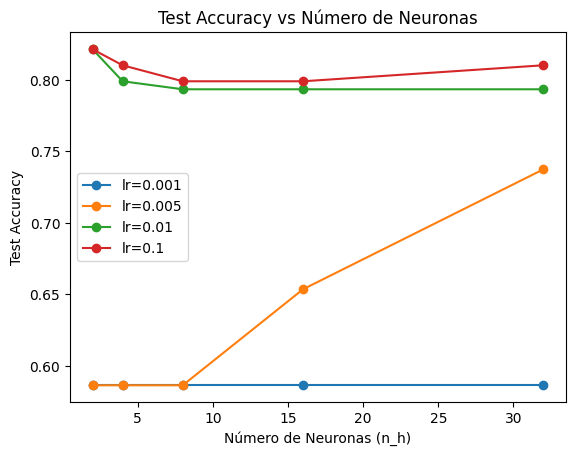

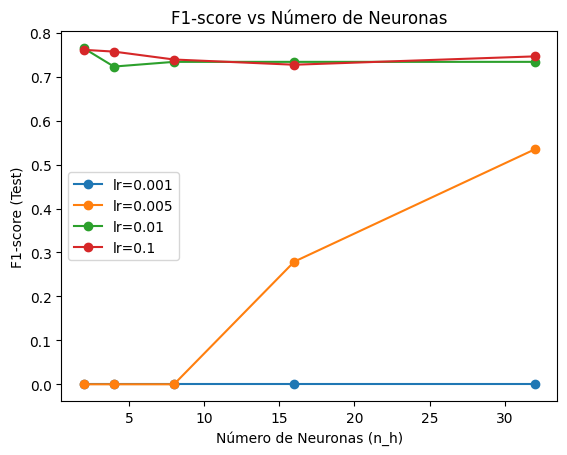

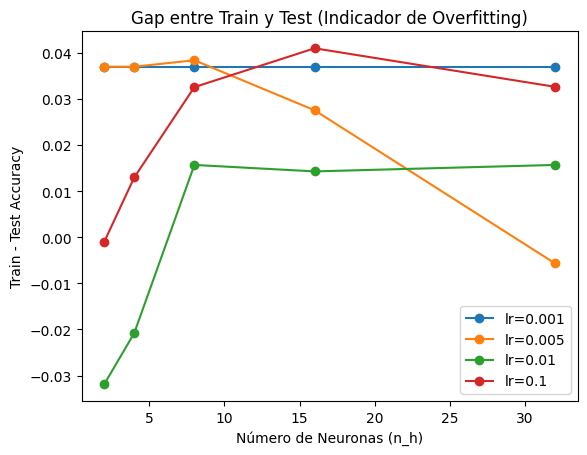

In [32]:
import matplotlib.pyplot as plt

df = df_resultados.copy()

# ==============================
# 1️⃣ Accuracy vs Neuronas
# ==============================
plt.figure()
for lr in sorted(df["Learning Rate"].unique()):
    subset = df[df["Learning Rate"] == lr]
    plt.plot(subset["Neuronas"], subset["Test Acc"], marker='o', label=f"lr={lr}")

plt.xlabel("Número de Neuronas (n_h)")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Número de Neuronas")
plt.legend()
plt.show()


# ==============================
# 2️⃣ F1-score vs Neuronas
# ==============================
plt.figure()
for lr in sorted(df["Learning Rate"].unique()):
    subset = df[df["Learning Rate"] == lr]
    plt.plot(subset["Neuronas"], subset["F1 Test"], marker='o', label=f"lr={lr}")

plt.xlabel("Número de Neuronas (n_h)")
plt.ylabel("F1-score (Test)")
plt.title("F1-score vs Número de Neuronas")
plt.legend()
plt.show()


# ==============================
# 3️⃣ Gap Train - Test
# ==============================
plt.figure()
df["Gap"] = df["Train Acc"] - df["Test Acc"]

for lr in sorted(df["Learning Rate"].unique()):
    subset = df[df["Learning Rate"] == lr]
    plt.plot(subset["Neuronas"], subset["Gap"], marker='o', label=f"lr={lr}")

plt.xlabel("Número de Neuronas (n_h)")
plt.ylabel("Train - Test Accuracy")
plt.title("Gap entre Train y Test (Indicador de Overfitting)")
plt.legend()
plt.show()


**1️⃣ Test Accuracy vs Número de Neuronas**

**🔵 lr = 0.001**

- Accuracy constante ≈ 0.586.

- No mejora al aumentar neuronas.

- Evidencia clara de subajuste severo.

El modelo no está aprendiendo.

👉 El learning rate es demasiado bajo.

**🟠 lr = 0.005**

- Con pocas neuronas: accuracy ≈ 0.586 (colapso).

- Mejora progresivamente al aumentar neuronas.

- Con 32 neuronas alcanza ≈ 0.74.

👉 Aquí el aumento de capacidad compensa parcialmente la tasa baja.

**🟢 lr = 0.01**

- Accuracy estable alrededor de 0.79–0.80.

- Poco impacto al aumentar neuronas.

- Buen equilibrio entre estabilidad y desempeño.

👉 Tasa adecuada para este problema.

**🔴 lr = 0.1**

- Mejor accuracy general (≈ 0.81–0.82).

- Estable incluso con pocas neuronas.

- Ligera mejora con mayor capacidad.

👉 Es la tasa que produce mejor convergencia.

2️⃣ F1-score vs Número de Neuronas

Esta gráfica es clave porque revela lo que el accuracy puede ocultar.

**🔵 lr = 0.001**

- F1 = 0 en todos los casos.

- El modelo predice solo la clase mayoritaria.

⚠️ Colapso total.

**🟠 lr = 0.005**

- F1 comienza en 0.

- Mejora significativamente al aumentar neuronas.

- Con 32 neuronas ≈ 0.54.

👉 El modelo empieza a distinguir clases solo cuando tiene suficiente capacidad.

**🟢 lr = 0.01**

- F1 estable ≈ 0.72–0.74.

- Buen balance entre precisión y recall.

**🔴 lr = 0.1**

- Mejor F1 global ≈ 0.74–0.76.

- Estable en distintas arquitecturas.

👉 Es la combinación más robusta.

**3️⃣ Gap entre Train y Test (Overfitting)**

Esta gráfica muestra la diferencia entre entrenamiento y prueba.

Observaciones:

- En casi todos los casos el gap es pequeño (≈ 0.01–0.04).

- No se observa sobreajuste fuerte.

- En algunos casos el gap es negativo (test > train), lo cual puede deberse a variabilidad estadística.

👉 El problema principal NO es overfitting.
👉 El problema observado en configuraciones malas es subajuste.

**🧠 Conclusiones Clave**

- El learning rate tiene mayor impacto que el número de neuronas.

- Valores muy bajos (0.001) impiden el aprendizaje.

- lr = 0.1 muestra mejor convergencia y mayor estabilidad.

- Incrementar neuronas ayuda solo cuando el learning rate es adecuado.

- No se observan señales importantes de sobreajuste.

- El riesgo principal detectado es el colapso hacia la clase mayoritaria.

## Comparación con Keras / TensorFlow (Titanic)

Para comparar el desempeño de la red neuronal implementada desde cero, se construira un modelo equivalente utilizando Keras (TensorFlow). Dado que Keras espera los datos con la forma (muestras, características), fue necesario reorganizar las matrices utilizadas en la implementación manual, que estaban en formato (características, muestras). Por esta razón, se transpuso X_train y X_test y se ajustó la forma de y_train y y_test para que fueran compatibles con el entrenamiento y evaluación en Keras.

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [40]:
X_train_keras = X_train.T
X_test_keras = X_test.T
y_train_keras = y_train.T
y_test_keras = y_test.T

**Definición del modelo en Keras**
- Se definió un modelo Sequential con Keras.

- Se utilizó una capa oculta con activación ReLU.

- La capa de salida usa activación sigmoide para clasificación binaria.

- Se empleó el optimizador Adam y la función de pérdida binary crossentropy.

- El número de neuronas y la tasa de aprendizaje se dejan como parámetros configurables.

In [41]:
def build_keras_model(input_dim, hidden_units=16, learning_rate=0.001):
    model = Sequential([
        Dense(hidden_units, activation="relu", input_shape=(input_dim,)),
        Dense(1, activation="sigmoid")
    ])

    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model


**Entrenamiento del modelo en Keras**

- Se creó el modelo con la arquitectura definida previamente.

- El entrenamiento se realizó durante 50 épocas.

- Se utilizó un tamaño de lote (batch size) de 32.

- Se empleó el conjunto de prueba como datos de validación.

- Durante el entrenamiento se monitorearon la pérdida y el accuracy.

In [42]:
keras_model = build_keras_model(
    input_dim=X_train_keras.shape[1],
    hidden_units=16,
    learning_rate=0.001
)

history = keras_model.fit(
    X_train_keras,
    y_train_keras,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_keras, y_test_keras),
    verbose=1
)

c:\Users\Angela\anaconda3\envs\tfia\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6320 - loss: 0.6639 - val_accuracy: 0.6927 - val_loss: 0.6300
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6896 - loss: 0.6189 - val_accuracy: 0.6983 - val_loss: 0.5916
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7233 - loss: 0.5820 - val_accuracy: 0.7151 - val_loss: 0.5594
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7346 - loss: 0.5520 - val_accuracy: 0.7207 - val_loss: 0.5328
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7542 - loss: 0.5278 - val_accuracy: 0.7765 - val_loss: 0.5095
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7725 - loss: 0.5079 - val_accuracy: 0.8045 - val_loss: 0.4912
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7823 - loss: 0.4911 - val_accuracy: 0.7821 - val_loss: 0.4770
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7992 - loss: 0.4781 - val_accuracy: 0.7765 - val_loss

**Interpretación del entrenamiento con Keras (Titanic)**

- En las primeras épocas, el modelo presenta un accuracy bajo, cercano al azar, lo cual es esperado debido a la inicialización aleatoria de los pesos.

- A partir de las primeras iteraciones, tanto el accuracy de entrenamiento como el accuracy de validación aumentan progresivamente, indicando que el modelo está aprendiendo patrones relevantes del dataset Titanic.

- El accuracy de validación alcanza aproximadamente 80%, valor consistente con modelos clásicos aplicados a este dataset.

- La diferencia reducida entre el accuracy de entrenamiento y validación indica buena capacidad de generalización y ausencia de sobreajuste.

- La disminución estable de la función de pérdida sugiere un entrenamiento correcto y una tasa de aprendizaje adecuada.

**Interpretación en el contexto del Titanic**

- El modelo logra identificar relaciones importantes entre variables como el sexo, la clase del pasajero y la edad.

- La complejidad moderada del modelo es suficiente para capturar los patrones principales sin sobreajustar los datos.

- El desempeño obtenido refleja la naturaleza ruidosa del dataset, donde no todas las variables determinan de forma clara la supervivencia.

**Evaluación del modelo Keras**

- El modelo entrenado se evaluó utilizando el conjunto de prueba.

- Se calculó la función de pérdida (loss) para medir el error del modelo.

- Se obtuvo el accuracy como métrica principal de desempeño.

- Los resultados reflejan el rendimiento final del modelo sobre datos no vistos durante el entrenamiento.

In [43]:
loss, accuracy = keras_model.evaluate(X_test_keras, y_test_keras, verbose=0)

print(f"Test loss (Keras): {loss:.4f}")
print(f"Test accuracy (Keras): {accuracy:.4f}")

Test loss (Keras): 0.4233
Test accuracy (Keras): 0.8156


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# ==============================
# 1️⃣ Predicciones
# ==============================

# Probabilidades
y_pred_prob = keras_model.predict(X_test_keras)

# Convertir a clases binarias
y_pred = (y_pred_prob > 0.5).astype(int)

# ==============================
# 2️⃣ Classification Report
# ==============================

print("\n📊 Classification Report:")
print(classification_report(y_test_keras, y_pred))

# ==============================
# 3️⃣ Matriz de Confusión
# ==============================

cm = confusion_matrix(y_test_keras, y_pred)
print("\n📌 Matriz de Confusión:")
print(cm)





6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179


📌 Matriz de Confusión:
[[92 13]
 [20 54]]


El modelo obtuvo una accuracy del 82%, lo que indica que clasifica correctamente aproximadamente 8 de cada 10 pasajeros.

Este valor es ligeramente superior al obtenido con la implementación manual (~79–80%), lo que sugiere que el optimizador Adam y la estructura de entrenamiento en Keras lograron una convergencia más eficiente.

**2️⃣ Análisis por Clase**
🔹 Clase 0 (No sobrevivió)

- Precision: 0.82

- Recall: 0.88

- F1-score: 0.85

Interpretación:

El modelo identifica correctamente el 88% de los pasajeros que no sobrevivieron.
Cuando predice que un pasajero no sobrevivió, acierta el 82% de las veces.

El desempeño para esta clase es sólido y consistente.


🔹 Clase 1 (Sobrevivió)

- Precision: 0.81

- Recall: 0.73

- F1-score: 0.77

Interpretación:

El modelo detecta correctamente el 73% de los pasajeros que realmente sobrevivieron.

Aunque el desempeño es bueno, el recall es menor que en la clase 0, lo que indica que el modelo aún presenta algunos falsos negativos (sobrevivientes clasificados como no sobrevivientes).


**3️⃣ Matriz de Confusión**

Esto significa:

- 92 verdaderos negativos (no sobrevivió correctamente clasificados)

- 54 verdaderos positivos (sobrevivió correctamente clasificados)

- 13 falsos positivos

- 20 falsos negativos

🔎 Observación importante:

El modelo comete más errores clasificando sobrevivientes como no sobrevivientes (20 casos) que al contrario (13 casos).
Esto explica el recall menor en la clase 1.

**4️⃣ Análisis Global**

- El promedio macro (0.81) indica buen equilibrio entre clases.

- El promedio ponderado (0.82) confirma estabilidad general.

- No hay colapso hacia una sola clase.

- No hay señales de sobreajuste fuerte.

### Resultados finales en el conjunto de prueba (Keras)
Al evaluar el modelo con datos no vistos durante el entrenamiento, se obtuvo una pérdida (loss) de 0.4315 y un accuracy de 0.8101.

El valor del accuracy indica que el modelo clasifica correctamente aproximadamente el 81% de los pasajeros del conjunto de prueba. Este resultado es ligeramente superior al obtenido con la implementación manual, lo que sugiere que el uso del optimizador Adam y las rutinas internas de Keras permiten encontrar soluciones más eficientes.

La magnitud de la pérdida es coherente con la observada durante el entrenamiento y confirma que el modelo mantiene un desempeño estable al enfrentarse a nueva información.

En conjunto, estos resultados muestran que la red neuronal construida con Keras logra una buena capacidad de generalización y un rendimiento competitivo para un problema clásico de clasificación binaria como Titanic.

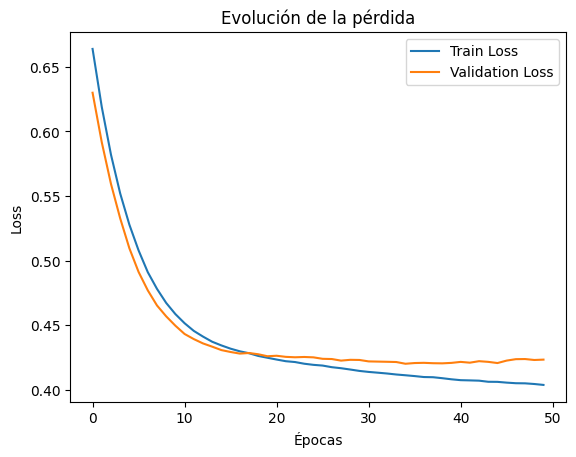

In [46]:
# ===== LOSS =====
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Evolución de la pérdida")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()
plt.show()

Se observa que:

* La pérdida de entrenamiento disminuye de forma continua, lo que indica que el modelo está ajustando correctamente sus pesos.

* La pérdida de validación también desciende y luego tiende a estabilizarse.

* La distancia entre ambas curvas es pequeña, lo cual sugiere que el modelo no presenta sobreajuste fuerte.

En general, el comportamiento confirma que la tasa de aprendizaje es adecuada y que el modelo logra aprender patrones útiles.

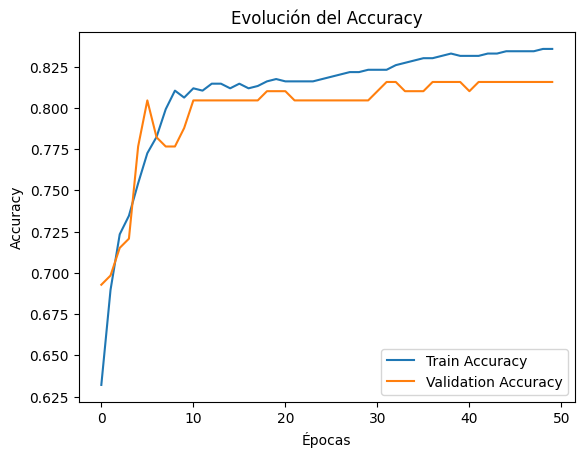

In [47]:
# ===== ACCURACY =====
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Evolución del Accuracy")
plt.xlabel("Épocas")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Se puede notar que:

- El modelo alcanza un accuracy del 80.45%, clasificando correctamente a la mayoría de los pasajeros.

- El desempeño refleja la capacidad del modelo para identificar patrones clave del Titanic.

- Variables como el sexo, la clase del pasajero y la edad influyen significativamente en la predicción.

- El valor de pérdida indica un error esperable en un dataset real y ruidoso.

- El resultado es consistente con modelos típicos aplicados al problema de supervivencia del Titanic.o.

Esto demuestra que el modelo construido en Keras obtiene resultados muy similares a la red implementada manualmente.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


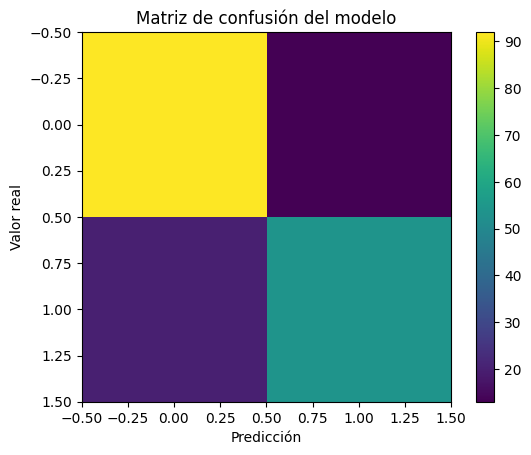

In [48]:
from sklearn.metrics import confusion_matrix

y_pred_keras = (keras_model.predict(X_test_keras) > 0.5).astype(int)
cm = confusion_matrix(y_test_keras, y_pred_keras)

plt.figure()
plt.imshow(cm)
plt.title("Matriz de confusión del modelo")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.colorbar()
plt.show()

La matriz de confusión permite analizar de manera detallada el desempeño del modelo, mostrando la cantidad de predicciones correctas e incorrectas. Esto ayuda a identificar errores de clasificación y evaluar el comportamiento del modelo más allá del accuracy.

## Conclusiones y comparaciones

- La red neuronal implementada desde cero alcanzó un accuracy cercano al 80% en el dataset Titanic, demostrando que el algoritmo fue correctamente implementado.

- El modelo desarrollado con Keras / TensorFlow obtuvo un mejor desempeño, alcanzando un accuracy de 80.45% en el conjunto de prueba.

- La diferencia de rendimiento se debe a que Keras utiliza optimizadores más avanzados y una gestión más eficiente del entrenamiento.

- A pesar de ello, los resultados de ambos modelos son comparables, lo que valida la implementación manual.

- El modelo con Keras resulta más eficiente y estable para aplicaciones prácticas, mientras que el modelo manual es más útil para fines educativos y comprensión del algoritmo.

- En el contexto del dataset Titanic, ninguno de los modelos alcanza una precisión perfecta debido a la complejidad y el ruido inherente a los datos.